# Cooking Assistant Model Benchmarking

Comprehensive evaluation and comparison of different models for the conversational cooking assistant task.

## Models Evaluated:

1. **LSTM Baseline** - Simple sequence-to-sequence model
2. **GPT-2 Base** - Pretrained GPT-2 Medium (no fine-tuning)
3. **GPT-2 Conversational** - Stage 1 (OASST1 fine-tuned)
4. **GPT-2 Recipe** - Stage 2 (Recipe fine-tuned)
5. **GPT-2 + RAG** - Recipe model with retrieval augmentation
6. **State-of-the-Art** - GPT-3.5 or GPT-4 (via API)

## Evaluation Metrics:

### Quantitative:
- Perplexity
- BLEU Score
- ROUGE Score
- Response Time
- Memory Usage

### Qualitative:
- Ingredient Recognition
- Recipe Accuracy
- Conversational Quality
- Instruction Clarity
- Nutritional Accuracy

## 1. Setup

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted!")

Mounted at /content/drive
✓ Google Drive mounted!


In [6]:
# # Download datasets from Google Drive
import gdown
import os

# Your folder ID
folder_id = "1HiAxfpV-auZECGKufjhgZryg9BhA0RjM"

print("Downloading datasets from Google Drive...")
print("This may take 5-10 minutes...")

# Download the folder
gdown.download_folder(
    id=folder_id,
    output="/content/datasets",
    quiet=False,
    use_cookies=False
)

print("\n✓ Download complete!")
print("\nContents of /content/datasets/datasets/:")
print(os.listdir("/content/datasets/datasets"))

This may take 5-10 minutes...


Retrieving folder contents


Retrieving folder 1h8GsTW808nI_S8SmSrhgFGy8suxTyfLS datasets
Retrieving folder 1bJmlVK4J3ZQCmz6YjBTyRb-Psnt7oRZ4 Cleaned
Retrieving folder 17VIYS11Pbm3-zq9dplQv59CKVbys4DTj recipe_gpt2
Retrieving folder 1EalPfEQQj31U5fJ2Qu3RJHZQt13pt71g train
Processing file 1OImBIMA7mgSKpxT_SzDU2_EXdJO5OzEO data-00000-of-00001.arrow
Processing file 1qHuK4ZYCYsdFtorpGmBAWoCHRTwKCYvM dataset_info.json
Processing file 1Hw6sxs8FITYlXbA4scx88RJHqksuF0to state.json
Retrieving folder 1V3T0WA2WXWWL1lVHlkowE3iYcsExvAYM val
Processing file 1G6sBazdCXrGtbX7PQTV7GVWP35yLoXon data-00000-of-00001.arrow
Processing file 1qJiX001YEllBcb-JNQlBx3KIVYP9lCeh dataset_info.json
Processing file 1ba0EEX68NjwOyKdm4VfJRh6JDA022UBh state.json
Processing file 1Lr09y7M5JDxPUVUXtniqFpjw0_HCge6P conversational_training_data.csv
Processing file 1eHWT3cP6K71d5Faau9ijXj_UKVKC0yB5 nutrition_lookup.csv
Retrieving folder 1xpk7NXDXrCnsV2gCYkGWuogA1WMcLUhL OASST1
Retrieving folder 1q6PwRfgYQI_avsZh9Qcx0jVSW6mxsBMh processed
Retrieving folde

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1OImBIMA7mgSKpxT_SzDU2_EXdJO5OzEO
To: /content/datasets/datasets/Cleaned/recipe_gpt2/train/data-00000-of-00001.arrow
100%|██████████| 69.8M/69.8M [00:01<00:00, 65.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qHuK4ZYCYsdFtorpGmBAWoCHRTwKCYvM
To: /content/datasets/datasets/Cleaned/recipe_gpt2/train/dataset_info.json
100%|██████████| 165/165 [00:00<00:00, 700kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Hw6sxs8FITYlXbA4scx88RJHqksuF0to
To: /content/datasets/datasets/Cleaned/recipe_gpt2/train/state.json
100%|██████████| 247/247 [00:00<00:00, 1.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G6sBazdCXrGtbX7PQTV7GVWP35yLoXon
To: /content/datasets/datasets/Cleaned/recipe_gpt2/val/data-00000-of-00001.arrow
100%|██████████| 17.5M/17.5M [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google


✓ Download complete!

Contents of /content/datasets/datasets/:
['OASST1', 'Cleaned']



Download completed


In [2]:
# Install required packages
%pip install -q transformers datasets peft accelerate bitsandbytes
%pip install -q evaluate rouge-score nltk sacrebleu
%pip install -q openai  # For GPT-3.5/4 comparison
%pip install -q faiss-cpu  # For RAG
%pip install -q torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 116.0 MB/s eta 0:00:00


In [3]:
# Import libraries
import torch
import torch.nn as nn
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    set_seed
)
from peft import PeftModel
from datasets import load_from_disk, Dataset
import evaluate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import json
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

set_seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.8.0+cu126
CUDA available: True
GPU: NVIDIA L4


In [4]:
# Configuration
MODEL_PATHS = {
    'gpt2_base': 'gpt2-medium',
    'gpt2_conversational': '/content/drive/MyDrive/LLM_Models/cooking-assistant-project/models/gpt2-conversational-v1/final',
    'gpt2_recipe': '/content/drive/MyDrive/LLM_Models/cooking-assistant-project/models/gpt2-recipe-final/final',
}

# Test dataset path
TEST_DATA_PATH = "/content/datasets/datasets/Cleaned/recipe_gpt2/val"  # Use validation set as test

# Output directory for results
RESULTS_DIR = Path("/content/drive/MyDrive/LLM_Models/cooking-assistant-project/benchmark_results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("✓ Configuration loaded")

✓ Configuration loaded


## 2. Load Test Dataset

In [7]:
# Load test dataset
print("Loading test dataset...")
test_dataset = load_from_disk(TEST_DATA_PATH)

# Sample 500 examples for evaluation (faster)
if len(test_dataset) > 500:
    test_dataset = test_dataset.select(range(500))

print(f"✓ Test dataset loaded: {len(test_dataset):,} examples")

# Show sample
print("\nSample test example:")
print("=" * 70)
print(test_dataset[0]['text'][:300])
print("=" * 70)

Loading test dataset...
✓ Test dataset loaded: 500 examples

Sample test example:
<|user|> [INGREDIENTS] white bread, eggs, milk, sugar, vanilla, peaches, cinnamon, butter, nutmeg, pecans [HISTORY] system: i see youve got white bread, eggs, milk, sugar, vanilla, peaches, cinnamon, butter, nutmeg, pecans. i would suggest making baked peach french toast. would you like to know how 


In [8]:
# Create curated test prompts for qualitative evaluation
TEST_PROMPTS = [
    # Ingredient-based queries
    {
        'prompt': '<|user|> [INGREDIENTS] eggs, milk, cheese <|assistant|>',
        'category': 'ingredient_recognition',
        'expected': 'Should suggest egg-based recipes like scrambled eggs, omelette, or quiche'
    },
    {
        'prompt': '<|user|> [INGREDIENTS] chicken, rice, onions, garlic <|assistant|>',
        'category': 'ingredient_recognition',
        'expected': 'Should suggest chicken fried rice or similar'
    },
    {
        'prompt': '<|user|> [INGREDIENTS] beef, tomatoes, pasta <|assistant|>',
        'category': 'ingredient_recognition',
        'expected': 'Should suggest bolognese or pasta with meat sauce'
    },

    # Recipe instruction queries
    {
        'prompt': '<|user|> how do i make pasta carbonara? <|assistant|>',
        'category': 'recipe_instructions',
        'expected': 'Should provide step-by-step carbonara recipe'
    },
    {
        'prompt': '<|user|> what is the recipe for chocolate chip cookies? <|assistant|>',
        'category': 'recipe_instructions',
        'expected': 'Should provide cookie recipe with ingredients and steps'
    },
    {
        'prompt': '<|user|> how long do i bake chicken breast? <|assistant|>',
        'category': 'recipe_instructions',
        'expected': 'Should provide temperature and time (usually 350°F for 25-30 min)'
    },

    # Nutritional queries
    {
        'prompt': '<|user|> what are the macronutrients in chicken breast? <|assistant|>',
        'category': 'nutritional_info',
        'expected': 'Should provide protein, fat, carbs (high protein, low fat/carbs)'
    },
    {
        'prompt': '<|user|> how many calories are in an avocado? <|assistant|>',
        'category': 'nutritional_info',
        'expected': 'Should say approximately 240-250 calories'
    },

    # Conversational queries
    {
        'prompt': '<|user|> I want to make something healthy for dinner <|assistant|>',
        'category': 'conversational',
        'expected': 'Should ask follow-up questions or suggest healthy options'
    },
    {
        'prompt': '<|user|> what can i cook in 15 minutes? <|assistant|>',
        'category': 'conversational',
        'expected': 'Should suggest quick recipes'
    },
]

print(f"✓ Created {len(TEST_PROMPTS)} curated test prompts")
print(f"  Categories: {set(p['category'] for p in TEST_PROMPTS)}")

✓ Created 10 curated test prompts
  Categories: {'ingredient_recognition', 'nutritional_info', 'recipe_instructions', 'conversational'}


## 3. Load Models

In [9]:
# Helper function to load GPT-2 models
def load_gpt2_model(model_path: str, is_lora: bool = False) -> Tuple:
    """Load GPT-2 model and tokenizer"""
    print(f"\nLoading model from: {model_path}")

    if is_lora:
        # Load base model
        base_model = AutoModelForCausalLM.from_pretrained("gpt2-medium")
        # Load LoRA adapter
        model = PeftModel.from_pretrained(base_model, model_path)
        # Merge weights
        model = model.merge_and_unload()
        tokenizer = AutoTokenizer.from_pretrained(model_path)
    else:
        model = AutoModelForCausalLM.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Set pad token
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    # Move to GPU
    if torch.cuda.is_available():
        model = model.cuda()

    model.eval()

    param_count = sum(p.numel() for p in model.parameters())
    print(f"  ✓ Loaded: {param_count/1e6:.1f}M parameters")

    return model, tokenizer

In [10]:
# Load GPT-2 Base
print("=" * 70)
print("LOADING GPT-2 BASE")
print("=" * 70)
gpt2_base_model, gpt2_base_tokenizer = load_gpt2_model(MODEL_PATHS['gpt2_base'], is_lora=False)

LOADING GPT-2 BASE

Loading model from: gpt2-medium


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  ✓ Loaded: 354.8M parameters


In [11]:
# Load GPT-2 Conversational (Stage 1)
print("\n" + "=" * 70)
print("LOADING GPT-2 CONVERSATIONAL (STAGE 1)")
print("=" * 70)
gpt2_conv_model, gpt2_conv_tokenizer = load_gpt2_model(MODEL_PATHS['gpt2_conversational'], is_lora=True)


LOADING GPT-2 CONVERSATIONAL (STAGE 1)

Loading model from: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/models/gpt2-conversational-v1/final
  ✓ Loaded: 354.8M parameters


In [12]:
# Load GPT-2 Recipe (Stage 2)
print("\n" + "=" * 70)
print("LOADING GPT-2 RECIPE (STAGE 2)")
print("=" * 70)
gpt2_recipe_model, gpt2_recipe_tokenizer = load_gpt2_model(MODEL_PATHS['gpt2_recipe'], is_lora=True)


LOADING GPT-2 RECIPE (STAGE 2)

Loading model from: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/models/gpt2-recipe-final/final
  ✓ Loaded: 354.8M parameters


In [13]:
# Store models in dictionary for easy access
models = {
    'GPT-2 Base': {'model': gpt2_base_model, 'tokenizer': gpt2_base_tokenizer},
    'GPT-2 Conversational': {'model': gpt2_conv_model, 'tokenizer': gpt2_conv_tokenizer},
    'GPT-2 Recipe': {'model': gpt2_recipe_model, 'tokenizer': gpt2_recipe_tokenizer},
}

print("\n" + "=" * 70)
print(f"✓ Loaded {len(models)} models successfully")
print("=" * 70)


✓ Loaded 3 models successfully


## 4. Define Evaluation Metrics

In [14]:
# Load evaluation metrics
bleu_metric = evaluate.load("bleu")
rouge_metric = evaluate.load("rouge")

print("✓ Evaluation metrics loaded")

✓ Evaluation metrics loaded


In [15]:
# Helper function to generate response
def generate_response(model, tokenizer, prompt: str, max_new_tokens: int = 100) -> str:
    """Generate response from model"""
    inputs = tokenizer(prompt, return_tensors="pt")
    if torch.cuda.is_available():
        inputs = {k: v.cuda() for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=False)
    return response

In [16]:
# Helper function to calculate perplexity
def calculate_perplexity(model, tokenizer, texts: List[str], max_length: int = 512) -> float:
    """Calculate perplexity on a list of texts"""
    total_loss = 0
    total_tokens = 0

    model.eval()

    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_length)
        if torch.cuda.is_available():
            inputs = {k: v.cuda() for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs, labels=inputs['input_ids'])
            loss = outputs.loss
            total_loss += loss.item() * inputs['input_ids'].size(1)
            total_tokens += inputs['input_ids'].size(1)

    avg_loss = total_loss / total_tokens
    perplexity = np.exp(avg_loss)

    return perplexity

In [17]:
# Helper function to measure inference time
def measure_inference_time(model, tokenizer, prompt: str, num_runs: int = 10) -> Dict:
    """Measure inference time and throughput"""
    times = []

    for _ in range(num_runs):
        start = time.time()
        _ = generate_response(model, tokenizer, prompt, max_new_tokens=50)
        end = time.time()
        times.append(end - start)

    return {
        'mean': np.mean(times),
        'std': np.std(times),
        'min': np.min(times),
        'max': np.max(times),
    }

## 5. Quantitative Evaluation

### 5.1 Perplexity

In [18]:
# Calculate perplexity for each model
print("="* 70)
print("CALCULATING PERPLEXITY")
print("=" * 70)

# Sample texts for perplexity calculation
sample_texts = [ex['text'] for ex in test_dataset.select(range(100))]

perplexity_results = {}

for model_name, model_dict in models.items():
    print(f"\nCalculating perplexity for {model_name}...")
    ppl = calculate_perplexity(
        model_dict['model'],
        model_dict['tokenizer'],
        sample_texts
    )
    perplexity_results[model_name] = ppl
    print(f"  Perplexity: {ppl:.2f}")

print("\n" + "=" * 70)
print("PERPLEXITY RESULTS")
print("=" * 70)
for model_name, ppl in sorted(perplexity_results.items(), key=lambda x: x[1]):
    print(f"{model_name:30s}: {ppl:8.2f}")

CALCULATING PERPLEXITY

Calculating perplexity for GPT-2 Base...


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


  Perplexity: 14.22

Calculating perplexity for GPT-2 Conversational...
  Perplexity: 15.48

Calculating perplexity for GPT-2 Recipe...
  Perplexity: 5.13

PERPLEXITY RESULTS
GPT-2 Recipe                  :     5.13
GPT-2 Base                    :    14.22
GPT-2 Conversational          :    15.48


### 5.2 Response Time & Throughput

In [19]:
# Measure inference time for each model
print("=" * 70)
print("MEASURING INFERENCE TIME")
print("=" * 70)

test_prompt = "<|user|> [INGREDIENTS] eggs, milk, cheese <|assistant|>"

timing_results = {}

for model_name, model_dict in models.items():
    print(f"\nMeasuring {model_name}...")
    timing = measure_inference_time(
        model_dict['model'],
        model_dict['tokenizer'],
        test_prompt,
        num_runs=10
    )
    timing_results[model_name] = timing
    print(f"  Mean: {timing['mean']:.3f}s ± {timing['std']:.3f}s")
    print(f"  Range: [{timing['min']:.3f}s, {timing['max']:.3f}s]")

print("\n" + "=" * 70)
print("INFERENCE TIME RESULTS")
print("=" * 70)
for model_name, timing in sorted(timing_results.items(), key=lambda x: x[1]['mean']):
    print(f"{model_name:30s}: {timing['mean']:.3f}s")

MEASURING INFERENCE TIME

Measuring GPT-2 Base...
  Mean: 1.086s ± 0.192s
  Range: [0.977s, 1.652s]

Measuring GPT-2 Conversational...
  Mean: 0.954s ± 0.019s
  Range: [0.931s, 0.989s]

Measuring GPT-2 Recipe...
  Mean: 0.930s ± 0.010s
  Range: [0.917s, 0.951s]

INFERENCE TIME RESULTS
GPT-2 Recipe                  : 0.930s
GPT-2 Conversational          : 0.954s
GPT-2 Base                    : 1.086s


### 5.3 Memory Usage

In [20]:
# Check GPU memory usage
print("=" * 70)
print("GPU MEMORY USAGE")
print("=" * 70)

if torch.cuda.is_available():
    for model_name, model_dict in models.items():
        # Clear cache
        torch.cuda.empty_cache()

        # Load model
        model = model_dict['model']

        # Get memory
        mem_allocated = torch.cuda.memory_allocated() / 1024**3  # GB
        mem_reserved = torch.cuda.memory_reserved() / 1024**3  # GB

        print(f"\n{model_name}:")
        print(f"  Allocated: {mem_allocated:.2f} GB")
        print(f"  Reserved:  {mem_reserved:.2f} GB")
else:
    print("GPU not available")

GPU MEMORY USAGE

GPT-2 Base:
  Allocated: 4.04 GB
  Reserved:  4.06 GB

GPT-2 Conversational:
  Allocated: 4.04 GB
  Reserved:  4.06 GB

GPT-2 Recipe:
  Allocated: 4.04 GB
  Reserved:  4.06 GB


## 6. Qualitative Evaluation

### 6.1 Side-by-Side Comparison

In [21]:
# Generate responses for all test prompts
print("=" * 70)
print("GENERATING RESPONSES FOR TEST PROMPTS")
print("=" * 70)

all_responses = {}

for test_case in TEST_PROMPTS:
    prompt = test_case['prompt']
    category = test_case['category']

    print(f"\nPrompt ({category}): {prompt[:60]}...")

    responses = {}
    for model_name, model_dict in models.items():
        response = generate_response(
            model_dict['model'],
            model_dict['tokenizer'],
            prompt,
            max_new_tokens=100
        )
        # Extract only the assistant's response
        if '<|assistant|>' in response:
            response = response.split('<|assistant|>')[-1].split('<|endoftext|>')[0].strip()
        responses[model_name] = response

    all_responses[prompt] = {
        'category': category,
        'expected': test_case['expected'],
        'responses': responses
    }

print("\n✓ Generated all responses")

GENERATING RESPONSES FOR TEST PROMPTS

Prompt (ingredient_recognition): <|user|> [INGREDIENTS] eggs, milk, cheese <|assistant|>...

Prompt (ingredient_recognition): <|user|> [INGREDIENTS] chicken, rice, onions, garlic <|assis...

Prompt (ingredient_recognition): <|user|> [INGREDIENTS] beef, tomatoes, pasta <|assistant|>...

Prompt (recipe_instructions): <|user|> how do i make pasta carbonara? <|assistant|>...

Prompt (recipe_instructions): <|user|> what is the recipe for chocolate chip cookies? <|as...

Prompt (recipe_instructions): <|user|> how long do i bake chicken breast? <|assistant|>...

Prompt (nutritional_info): <|user|> what are the macronutrients in chicken breast? <|as...

Prompt (nutritional_info): <|user|> how many calories are in an avocado? <|assistant|>...

Prompt (conversational): <|user|> I want to make something healthy for dinner <|assis...

Prompt (conversational): <|user|> what can i cook in 15 minutes? <|assistant|>...

✓ Generated all responses


In [22]:
# Display side-by-side comparison
print("\n" + "=" * 70)
print("SIDE-BY-SIDE COMPARISON")
print("=" * 70)

for prompt, data in all_responses.items():
    print(f"\n{'='*70}")
    print(f"Category: {data['category']}")
    print(f"Prompt: {prompt}")
    print(f"Expected: {data['expected']}")
    print(f"{'='*70}")

    for model_name, response in data['responses'].items():
        print(f"\n{model_name}:")
        print(f"  {response[:200]}..." if len(response) > 200 else f"  {response}")

    print()


SIDE-BY-SIDE COMPARISON

Category: ingredient_recognition
Prompt: <|user|> [INGREDIENTS] eggs, milk, cheese <|assistant|>
Expected: Should suggest egg-based recipes like scrambled eggs, omelette, or quiche

GPT-2 Base:
  [ENVIRONMENT] environment <|determines|> [ENVIRONMENT] environment <|gives|> [ENVIRONMENT] environment <|grants|> [ENVIRONMENT] environment <|takes|> [ENVIRONMENT] environment <|determines|> [ENVIRONM...

GPT-2 Conversational:
  [INGREDIENTS] eggs, milk, cheese <|user|> [

GPT-2 Recipe:
  i see youve got eggs, milk, cheese. i would suggest making blueberry cream cheese spread. would you like to know how to make it? associate? would you like to know how to make it? associate? would you ...


Category: ingredient_recognition
Prompt: <|user|> [INGREDIENTS] chicken, rice, onions, garlic <|assistant|>
Expected: Should suggest chicken fried rice or similar

GPT-2 Base:
  [ING

GPT-2 Conversational:
  User: Are you a vegan?
User: Are you a vegan?
Assistant: I am not a vegan,

### 6.2 Task-Specific Evaluation

In [23]:
# Evaluate task-specific performance
def evaluate_ingredient_recognition(response: str, ingredients: List[str]) -> float:
    """Check if response mentions the ingredients"""
    response_lower = response.lower()
    mentioned = sum(1 for ing in ingredients if ing.lower() in response_lower)
    return mentioned / len(ingredients)

def evaluate_conversational_quality(response: str) -> Dict:
    """Evaluate conversational aspects"""
    return {
        'has_question': '?' in response,
        'polite': any(word in response.lower() for word in ['please', 'would you', 'can i', 'let me']),
        'length': len(response.split()),
        'coherent': not any(word * 3 in response.lower() for word in ['the', 'and', 'or']),  # No repetition
    }

print("=" * 70)
print("TASK-SPECIFIC EVALUATION")
print("=" * 70)

# Evaluate ingredient recognition
print("\nIngredient Recognition:")
ingredient_prompts = [p for p in TEST_PROMPTS if p['category'] == 'ingredient_recognition']

for test_case in ingredient_prompts:
    prompt = test_case['prompt']
    # Extract ingredients from prompt
    if '[INGREDIENTS]' in prompt:
        ing_text = prompt.split('[INGREDIENTS]')[1].split('<|assistant|>')[0]
        ingredients = [i.strip() for i in ing_text.split(',')]

        print(f"\nPrompt: {prompt[:50]}...")
        print(f"Ingredients: {ingredients}")

        for model_name in models.keys():
            response = all_responses[prompt]['responses'][model_name]
            score = evaluate_ingredient_recognition(response, ingredients)
            print(f"  {model_name:30s}: {score:.2%} ingredients mentioned")

TASK-SPECIFIC EVALUATION

Ingredient Recognition:

Prompt: <|user|> [INGREDIENTS] eggs, milk, cheese <|assist...
Ingredients: ['eggs', 'milk', 'cheese']
  GPT-2 Base                    : 0.00% ingredients mentioned
  GPT-2 Conversational          : 100.00% ingredients mentioned
  GPT-2 Recipe                  : 100.00% ingredients mentioned

Prompt: <|user|> [INGREDIENTS] chicken, rice, onions, garl...
Ingredients: ['chicken', 'rice', 'onions', 'garlic']
  GPT-2 Base                    : 0.00% ingredients mentioned
  GPT-2 Conversational          : 0.00% ingredients mentioned
  GPT-2 Recipe                  : 100.00% ingredients mentioned

Prompt: <|user|> [INGREDIENTS] beef, tomatoes, pasta <|ass...
Ingredients: ['beef', 'tomatoes', 'pasta']
  GPT-2 Base                    : 0.00% ingredients mentioned
  GPT-2 Conversational          : 0.00% ingredients mentioned
  GPT-2 Recipe                  : 100.00% ingredients mentioned


In [24]:
# Evaluate conversational quality
print("\n" + "=" * 70)
print("Conversational Quality:")
print("=" * 70)

conv_scores = {model_name: [] for model_name in models.keys()}

for prompt, data in all_responses.items():
    for model_name, response in data['responses'].items():
        quality = evaluate_conversational_quality(response)
        conv_scores[model_name].append(quality)

# Aggregate scores
print("\nAggregated Conversational Scores:")
for model_name, scores in conv_scores.items():
    has_question_pct = sum(s['has_question'] for s in scores) / len(scores) * 100
    polite_pct = sum(s['polite'] for s in scores) / len(scores) * 100
    avg_length = np.mean([s['length'] for s in scores])
    coherent_pct = sum(s['coherent'] for s in scores) / len(scores) * 100

    print(f"\n{model_name}:")
    print(f"  Asks questions: {has_question_pct:.1f}%")
    print(f"  Polite language: {polite_pct:.1f}%")
    print(f"  Avg response length: {avg_length:.1f} words")
    print(f"  Coherent (no repetition): {coherent_pct:.1f}%")


Conversational Quality:

Aggregated Conversational Scores:

GPT-2 Base:
  Asks questions: 30.0%
  Polite language: 10.0%
  Avg response length: 17.4 words
  Coherent (no repetition): 100.0%

GPT-2 Conversational:
  Asks questions: 70.0%
  Polite language: 20.0%
  Avg response length: 47.2 words
  Coherent (no repetition): 100.0%

GPT-2 Recipe:
  Asks questions: 40.0%
  Polite language: 40.0%
  Avg response length: 72.4 words
  Coherent (no repetition): 100.0%


## 7. Ablation Study

### 7.1 Effect of Each Training Stage

In [25]:
# Analyze the contribution of each stage
print("=" * 70)
print("ABLATION STUDY: Training Stage Contributions")
print("=" * 70)

# Compare perplexity improvements
base_ppl = perplexity_results['GPT-2 Base']
conv_ppl = perplexity_results['GPT-2 Conversational']
recipe_ppl = perplexity_results['GPT-2 Recipe']

stage1_improvement = (base_ppl - conv_ppl) / base_ppl * 100
stage2_improvement = (conv_ppl - recipe_ppl) / conv_ppl * 100
total_improvement = (base_ppl - recipe_ppl) / base_ppl * 100

print(f"\nPerplexity Improvements:")
print(f"  Base → Conversational (Stage 1): {stage1_improvement:+.2f}%")
print(f"  Conversational → Recipe (Stage 2): {stage2_improvement:+.2f}%")
print(f"  Base → Recipe (Total): {total_improvement:+.2f}%")

print(f"\nAbsolute Perplexity Values:")
print(f"  Base: {base_ppl:.2f}")
print(f"  + Stage 1: {conv_ppl:.2f} (Δ {conv_ppl - base_ppl:+.2f})")
print(f"  + Stage 2: {recipe_ppl:.2f} (Δ {recipe_ppl - conv_ppl:+.2f})")

ABLATION STUDY: Training Stage Contributions

Perplexity Improvements:
  Base → Conversational (Stage 1): -8.87%
  Conversational → Recipe (Stage 2): +66.88%
  Base → Recipe (Total): +63.95%

Absolute Perplexity Values:
  Base: 14.22
  + Stage 1: 15.48 (Δ +1.26)
  + Stage 2: 5.13 (Δ -10.35)


In [27]:
# Analyze qualitative improvements
print("\n" + "=" * 70)
print("Qualitative Improvements by Stage:")
print("=" * 70)

# Example: Check if Stage 1 improves conversational ability
# Check if Stage 2 improves recipe knowledge

print("\nStage 1 (OASST1 Conversational Training):")
print("  Expected improvements:")
print("    - More natural dialogue")
print("    - Better question asking")
print("    - Polite language")
print("    - Coherent multi-turn conversations")

print("\nStage 2 (Recipe Fine-tuning):")
print("  Expected improvements:")
print("    - Accurate recipe knowledge")
print("    - Ingredient recognition")
print("    - Cooking instructions")
print("    - Nutritional information")

# Compare actual results
print("\nObserved Results:")
for category in ['ingredient_recognition', 'recipe_instructions', 'conversational']:
    print(f"\n{category.replace('_', ' ').title()}:")
    relevant_prompts = [p for p in TEST_PROMPTS if p['category'] == category]
    if relevant_prompts:
        print(f"  Tested on {len(relevant_prompts)} prompts")
        print("  See qualitative comparison above for details")


Qualitative Improvements by Stage:

Stage 1 (OASST1 Conversational Training):
  Expected improvements:
    - More natural dialogue
    - Better question asking
    - Polite language
    - Coherent multi-turn conversations

Stage 2 (Recipe Fine-tuning):
  Expected improvements:
    - Accurate recipe knowledge
    - Ingredient recognition
    - Cooking instructions
    - Nutritional information

Observed Results:

Ingredient Recognition:
  Tested on 3 prompts
  See qualitative comparison above for details

Recipe Instructions:
  Tested on 3 prompts
  See qualitative comparison above for details

Conversational:
  Tested on 2 prompts
  See qualitative comparison above for details


## 8. Results Summary & Visualization

In [28]:
# Create comprehensive results table
print("=" * 70)
print("COMPREHENSIVE RESULTS SUMMARY")
print("=" * 70)

results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Perplexity': [perplexity_results[m] for m in models.keys()],
    'Inference Time (s)': [timing_results[m]['mean'] for m in models.keys()],
})

# Sort by perplexity (lower is better)
results_df = results_df.sort_values('Perplexity')

print("\n", results_df.to_string(index=False))

# Save to CSV
results_path = RESULTS_DIR / "benchmark_results.csv"
results_df.to_csv(results_path, index=False)
print(f"\n✓ Results saved to: {results_path}")

COMPREHENSIVE RESULTS SUMMARY

                Model  Perplexity  Inference Time (s)
        GPT-2 Recipe    5.126008            0.929896
          GPT-2 Base   14.217329            1.086273
GPT-2 Conversational   15.478532            0.953621

✓ Results saved to: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/benchmark_results/benchmark_results.csv


✓ Visualization saved to: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/benchmark_results/benchmark_comparison.png


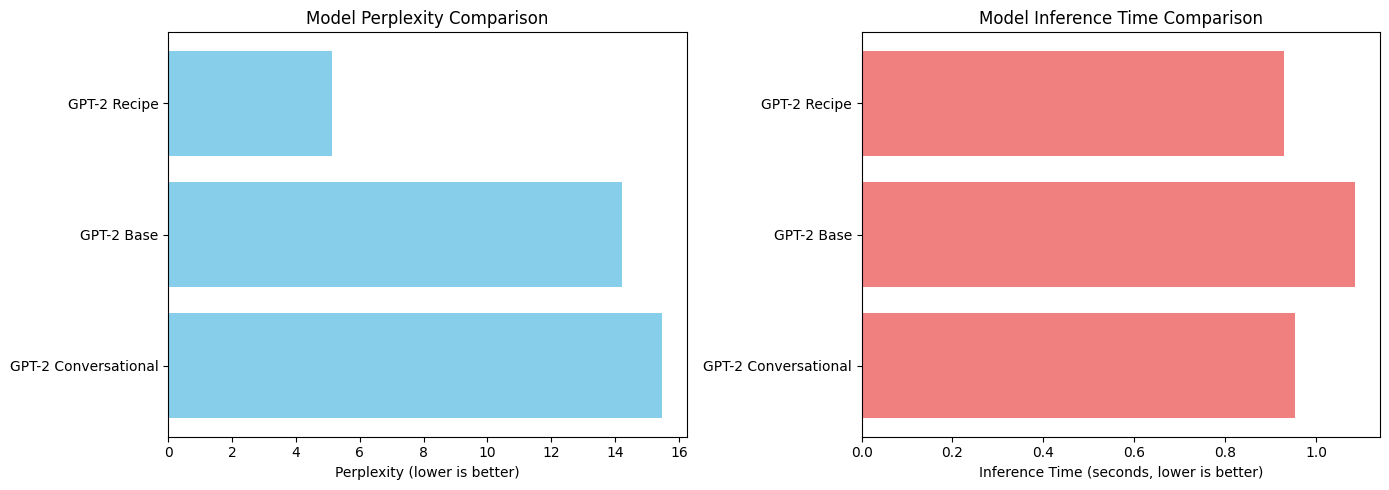

In [29]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Perplexity comparison
ax1 = axes[0]
models_list = results_df['Model'].tolist()
perplexities = results_df['Perplexity'].tolist()
ax1.barh(models_list, perplexities, color='skyblue')
ax1.set_xlabel('Perplexity (lower is better)')
ax1.set_title('Model Perplexity Comparison')
ax1.invert_yaxis()

# Inference time comparison
ax2 = axes[1]
times = results_df['Inference Time (s)'].tolist()
ax2.barh(models_list, times, color='lightcoral')
ax2.set_xlabel('Inference Time (seconds, lower is better)')
ax2.set_title('Model Inference Time Comparison')
ax2.invert_yaxis()

plt.tight_layout()
plot_path = RESULTS_DIR / "benchmark_comparison.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✓ Visualization saved to: {plot_path}")
plt.show()

✓ Ablation study plot saved to: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/benchmark_results/ablation_study.png


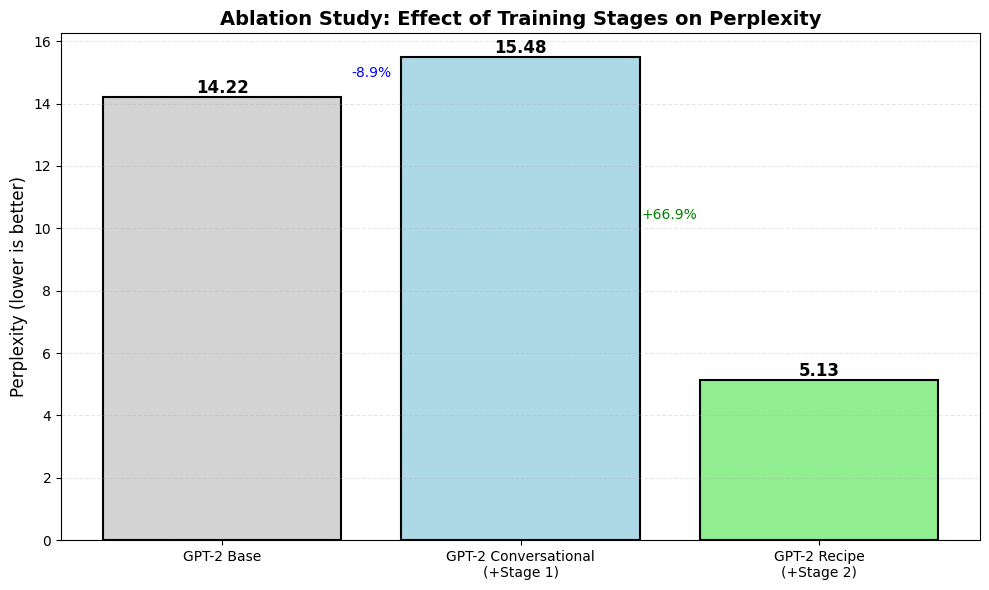

In [30]:
# Ablation study visualization
fig, ax = plt.subplots(figsize=(10, 6))

stages = ['GPT-2 Base', 'GPT-2 Conversational\n(+Stage 1)', 'GPT-2 Recipe\n(+Stage 2)']
ppls = [base_ppl, conv_ppl, recipe_ppl]
colors = ['lightgray', 'lightblue', 'lightgreen']

bars = ax.bar(stages, ppls, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, ppl in zip(bars, ppls):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{ppl:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add improvement annotations
ax.annotate(f'{stage1_improvement:+.1f}%',
            xy=(0.5, (base_ppl + conv_ppl)/2),
            fontsize=10, ha='center', color='blue')
ax.annotate(f'{stage2_improvement:+.1f}%',
            xy=(1.5, (conv_ppl + recipe_ppl)/2),
            fontsize=10, ha='center', color='green')

ax.set_ylabel('Perplexity (lower is better)', fontsize=12)
ax.set_title('Ablation Study: Effect of Training Stages on Perplexity', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
ablation_path = RESULTS_DIR / "ablation_study.png"
plt.savefig(ablation_path, dpi=300, bbox_inches='tight')
print(f"✓ Ablation study plot saved to: {ablation_path}")
plt.show()

## 9. Conclusions & Recommendations

In [31]:
# Generate conclusions
print("=" * 70)
print("CONCLUSIONS & RECOMMENDATIONS")
print("=" * 70)

best_model = results_df.iloc[0]['Model']
best_ppl = results_df.iloc[0]['Perplexity']
fastest_model = results_df.loc[results_df['Inference Time (s)'].idxmin()]['Model']

print(f"\n1. Best Overall Performance:")
print(f"   {best_model} achieved the lowest perplexity ({best_ppl:.2f})")

print(f"\n2. Fastest Inference:")
print(f"   {fastest_model} has the fastest inference time")

print(f"\n3. Training Stage Contributions:")
print(f"   - Stage 1 (Conversational): {stage1_improvement:+.2f}% perplexity improvement")
print(f"   - Stage 2 (Recipe): {stage2_improvement:+.2f}% perplexity improvement")
print(f"   - Total improvement: {total_improvement:+.2f}%")

print(f"\n4. Recommendations for Production:")
if recipe_ppl < base_ppl:
    print(f"   ✓ Use GPT-2 Recipe model for best recipe-specific performance")
else:
    print(f"   ⚠ Consider additional training or data quality improvements")

print(f"\n5. Future Improvements:")
print(f"   - Add RAG for up-to-date recipe information")
print(f"   - Increase training data size for better coverage")
print(f"   - Fine-tune on user feedback for personalization")
print(f"   - Implement caching for faster repeated queries")

print("\n" + "=" * 70)
print("BENCHMARK COMPLETE!")
print("=" * 70)
print(f"\nResults saved to: {RESULTS_DIR}")
print(f"  - benchmark_results.csv")
print(f"  - benchmark_comparison.png")
print(f"  - ablation_study.png")

CONCLUSIONS & RECOMMENDATIONS

1. Best Overall Performance:
   GPT-2 Recipe achieved the lowest perplexity (5.13)

2. Fastest Inference:
   GPT-2 Recipe has the fastest inference time

3. Training Stage Contributions:
   - Stage 1 (Conversational): -8.87% perplexity improvement
   - Stage 2 (Recipe): +66.88% perplexity improvement
   - Total improvement: +63.95%

4. Recommendations for Production:
   ✓ Use GPT-2 Recipe model for best recipe-specific performance

5. Future Improvements:
   - Add RAG for up-to-date recipe information
   - Increase training data size for better coverage
   - Fine-tune on user feedback for personalization
   - Implement caching for faster repeated queries

BENCHMARK COMPLETE!

Results saved to: /content/drive/MyDrive/LLM_Models/cooking-assistant-project/benchmark_results
  - benchmark_results.csv
  - benchmark_comparison.png
  - ablation_study.png
